In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from collections import Counter
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Collect the data into a DataFrame

In [3]:
df = pd.read_csv("athlete_events.csv")

In [4]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [7]:
df.shape

(271116, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


This dataset contains athletes information in Olympic games from 1896 to 2016. There are 271116 rows and 15 columns which contaings informatoin about athletes.

In [8]:
#let's find out the only column name
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

# Corelation of the datasets

In [12]:
#.corr() shows correlations between features in data. To see it clearly, we will use heatmap
df.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


# let's show the corelation on heatmap

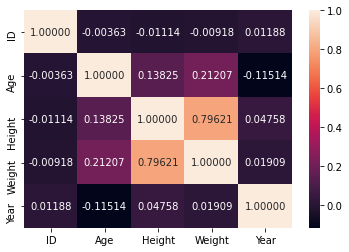

In [15]:
sns.heatmap(df.corr(),annot=True,fmt=".5f") 

### There is one obvious correlation which is between height and weight.

In [ ]:
# this is variety of games increased by the time. we will use horizantal barplot for this.

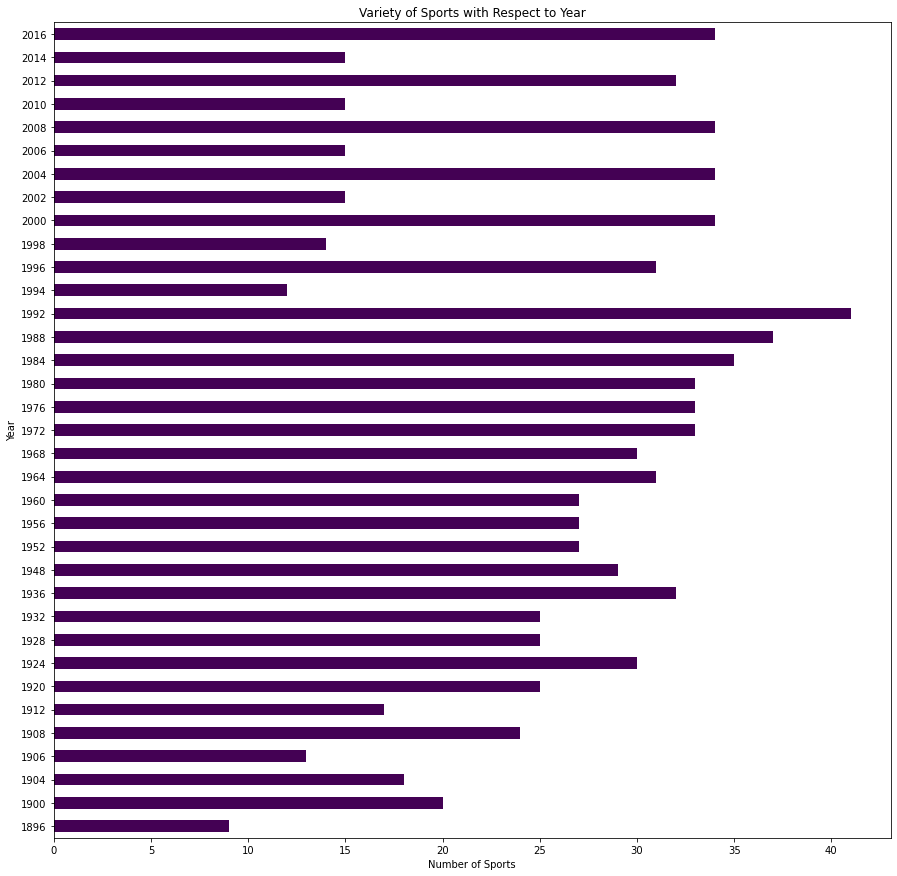

In [16]:
df_copy=df[["Year","Sport"]]
years=df["Year"].unique()
sports=[]
for y in years:
    sports.append(len(df[df["Year"]==y]["Sport"].unique()))
sports_and_year=pd.DataFrame({"Year":years,"Number of Sport":sports})
sorted_data=sports_and_year.sort_values(by="Year",ascending=True).reset_index(drop=True)

#Visualizing
sorted_data.plot(kind="barh",x="Year",y="Number of Sport",figsize=(15,15),cmap="viridis",legend=False)
plt.xlabel("Number of Sports")
plt.title("Variety of Sports with Respect to Year")
plt.show()
# We can see there is an dramatic increate till 1992 after that there is an olympic competiton in every two year

# Number of Males and Females in Each Year

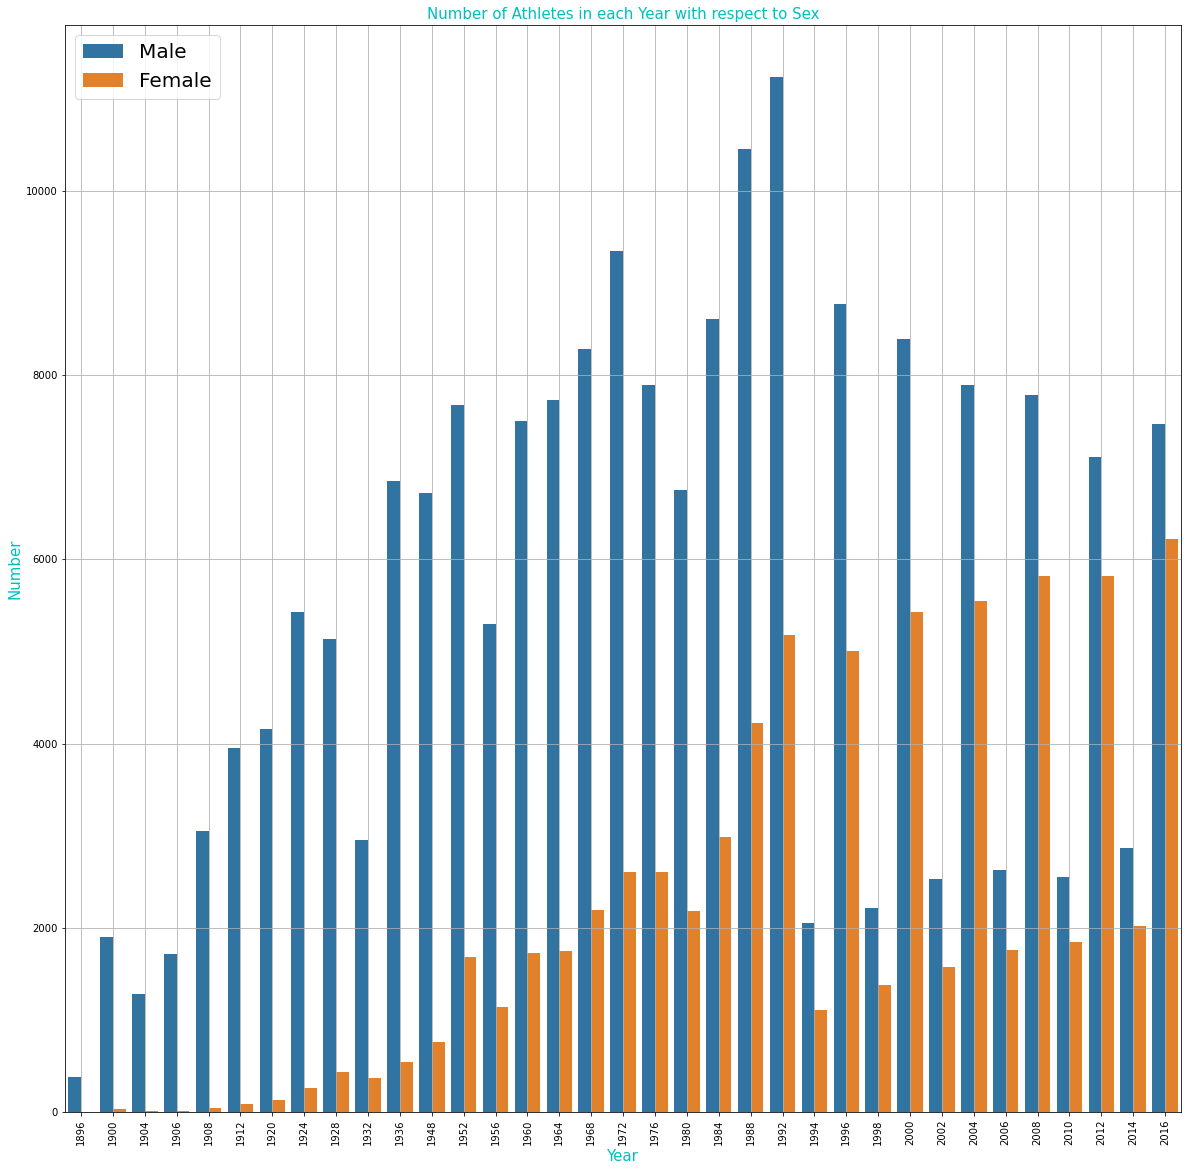

In [17]:
year_sex=df[["Year","Sex"]]
sex_counter={"Year":[],"Gender":[],"Number":[]}
for i in years:
    males=year_sex[(year_sex["Year"]==i)&(year_sex["Sex"]=="M")].Sex.count()
    sex_counter["Gender"].append("Male")
    sex_counter["Number"].append(males)
    sex_counter["Year"].append(i)
    females=year_sex[(year_sex["Year"]==i)&(year_sex["Sex"]=="F")].Sex.count()
    sex_counter["Gender"].append("Female")
    sex_counter["Number"].append(females)
    sex_counter["Year"].append(i)
sex_data=pd.DataFrame(sex_counter)


#Visualizing Data

plt.figure(figsize=(20,20))
sns.barplot(data=sex_data,x="Year",y="Number",hue="Gender")
plt.legend(fontsize=20,loc="upper left")

plt.xlabel("Year",color="c",size=15)
plt.ylabel("Number",color="c",size=15)
plt.xticks(rotation=90)
plt.grid()
plt.title("Number of Athletes in each Year with respect to Sex",color="c",size=15)
plt.show()

#### We can see that number of females are increased till 1992. After that,olympics are made in every 2 years.
#### In 1994-1998-2002-2006-2010-2014 olympics, there is a clear trend that shows increase in number of females.In 1992-1996-2000-2004-2008-1012-2012 olympics which are more crowded, number of females is mostly increased

# Number of Medals that Countries Have Each Year

In [22]:
#Preparing Data
df["Medal"]=df["Medal"].fillna(value=0,axis=0)#Filling Nan values in medals as 0
df_copy=df[["Year","Team","Medal"]]
df_copy["Medal"]=[1 if (i=="Gold" or i=="Silver" or i=="Bronze" )else 0 for i in df_copy["Medal"]]

date=[]
teams=[]
medals=[]
for i in years:
    countries=list(df_copy[df_copy["Year"]==i]["Team"].unique())
    for c in  countries:
        total=df_copy[(df_copy["Team"]==c)&(df_copy["Year"]==i)].Medal.sum()
        medals.append(total)
        date.append(i)
        teams.append(c)

<ipython-input-22-2e21348467d5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
#Visualisation by plotly
medals_countries=pd.DataFrame(zip(date,teams,medals),columns=["Year","Team","Medals"])
medals_countries.drop(medals_countries[medals_countries["Medals"]==0].index,inplace=True,axis=0)#Dropping countries which have 0 medals
medals_countries.sort_values(by=["Year","Medals"],inplace=True,axis=0,ascending=False)
import plotly.express as px

fig = px.bar(medals_countries, x="Team", y="Medals", color="Medals",
  animation_frame="Year", animation_group="Team", range_y=[0,500],width=800,height=400,range_x=[0,11])

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white",title="Total Number of Medals Each Country Have with respect to Year"
)
fig.show()

#### We can see total number of medals that countries won in each year from 2016 to 1896

# Number of olympics that organized in each country

In [26]:
#Prepare data
cities=list(df["City"].unique())
number=[]
for c in cities:
    num=len(df[df["City"]==c])
    number.append(num)
olympics=pd.DataFrame(zip(cities,number),columns=["Cities","Total_Number_of_Olympics"])
#We need locations of cities to plot in map
locations=[[41.385063,2.173404],[51.507351,-0.121350],[51.219448,4.402464],[48.856613,2.352222],[51.040460,-114.064167],[45.670448,6.396301],[61.115244,10.466263],[34.075611,-118.297007],[40.754621,-111.902293],[60.169846,24.938383],[44.277978,-73.983374],[-33.877757,151.210423],[33.761983,-84.394615],[59.329344,18.068761],[43.586784,39.721302],[36.639257,138.139658],[45.069010,7.680472],[39.912139,116.410544],[-22.933838,-43.203143],[37.986588,23.727988],[39.197519,-120.235418],[47.287108,11.365400],[43.871561,18.415122],[19.404394,-99.160998],[48.155810,11.538132],[37.551010,126.986137],[52.513924,13.374411],[59.913654,10.752023],[46.536867,12.138926],[-37.815708,144.962830],[41.889501,12.495944],[52.368971,4.870650],[45.536212,-73.629094],[55.745989,37.621592],[35.676647,139.656742],[49.244280,-123.115610],[45.182241,5.724209],[42.974103,141.310834],[45.927709,6.890412],[47.602718,7.542398],[46.500265,9.816901],[47.489244,11.093460]]#Start with mexico city   
olympics["lat"]=[locations[i][0] for i in range(len(locations))]
olympics["lon"]=[locations[i][1] for i in range(len(locations))]

In [27]:
#Visualisation by Bubble Plot
fig = px.scatter_geo(olympics, lat="lat",lon="lon", color="Cities",
                     hover_name="Cities", size="Total_Number_of_Olympics",
                     projection="natural earth")
fig.update_layout(
    title={
        'text':"Number of Olympics which are Hosted by Each Cities",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()
plt.savefig("picture1.png")

<Figure size 432x288 with 0 Axes>

# Percentage of Athletes from each sport category

In [28]:
number=[]
sports=list(df["Sport"].unique())
for s in sports:
    number.append(len(df[df["Sport"]==s]))
df_copy=pd.DataFrame(zip(sports,number),columns=["Sport","Number"])

In [29]:
fig = px.pie(df_copy, values='Number', names='Sport', title='Population of European continent')
fig.show()
plt.savefig("picture2.png")

<Figure size 432x288 with 0 Axes>

#### We can see percentage of each sports with respect to number of athletes. Athletics, Gymnastics, swimming are sports which have most number of athletes